In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600
1,1980-12-15,0.094005,0.094005,0.093575,0.093575,175884800
2,1980-12-16,0.087136,0.087136,0.086707,0.086707,105728000
3,1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600
4,1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600


In [2]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11137 entries, 0 to 11136
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11137 non-null  object 
 1   Open    11137 non-null  float64
 2   High    11137 non-null  float64
 3   Low     11137 non-null  float64
 4   Close   11137 non-null  float64
 5   Volume  11137 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 522.2+ KB


In [7]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Sort by Date
df.sort_values('Date', inplace=True)

In [9]:
# Drop Date column for regression
X = df.drop(columns=['Date', 'Close'])  # Features
y = df['Close']  # Target Variable

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# --- Linear Regression ---
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
y_pred_lr = lr.predict(X_test_scaled)
print(f"Linear Regression R2: {r2_score(y_test, y_pred_lr):.4f}")

Linear Regression R2: 1.0000


In [14]:
# --- KNN Regression ---
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [15]:
y_pred_knn = knn.predict(X_test_scaled)
print(f"KNN Regression R2: {r2_score(y_test, y_pred_knn):.4f}")

KNN Regression R2: 0.9998


In [16]:
# --- SVM Regression ---
svm = SVR()
svm.fit(X_train_scaled, y_train)

SVR()

In [17]:
y_pred_svm = svm.predict(X_test_scaled)
print(f"SVM Regression R2: {r2_score(y_test, y_pred_svm):.4f}")

SVM Regression R2: 0.9901


In [18]:
# --- Random Forest Regression ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [19]:
y_pred_rf = rf.predict(X_test_scaled)
print(f"Random Forest Regression R2: {r2_score(y_test, y_pred_rf):.4f}")

Random Forest Regression R2: 0.9999


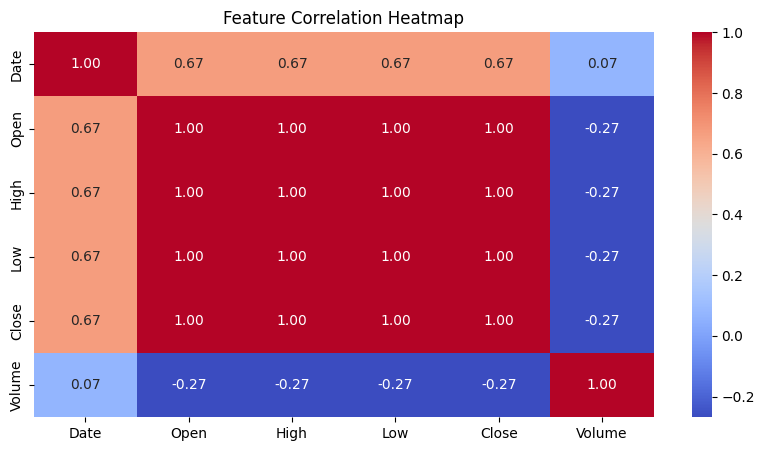

In [20]:
# --- Visualizations ---
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

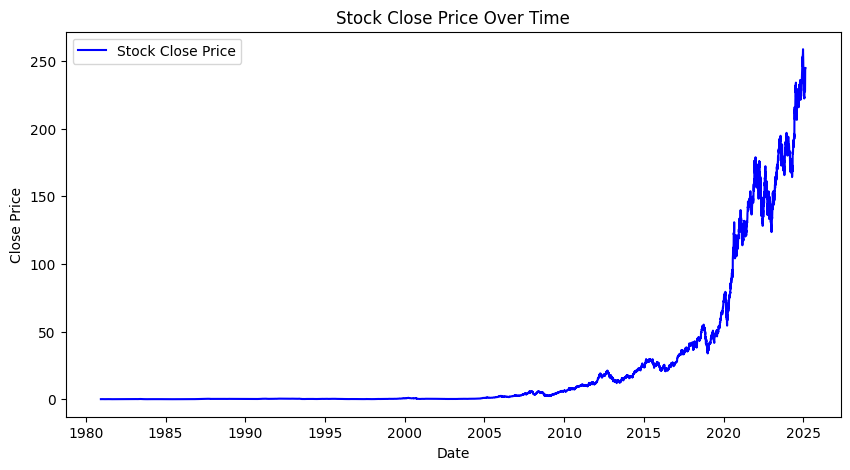

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Stock Close Price', color='blue')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Close Price Over Time")
plt.legend()
plt.show()

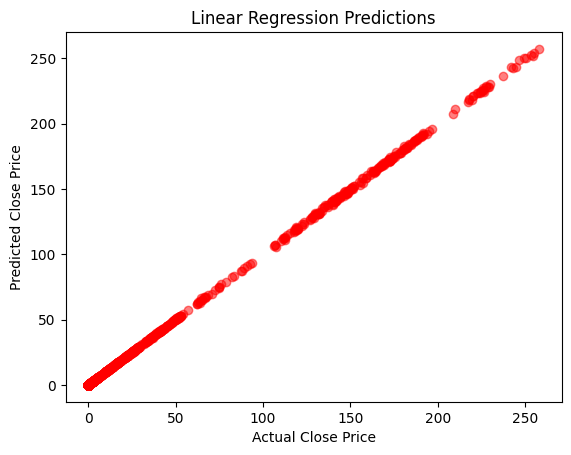

In [22]:
plt.scatter(y_test, y_pred_lr, color='red', alpha=0.5)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Linear Regression Predictions")
plt.show()

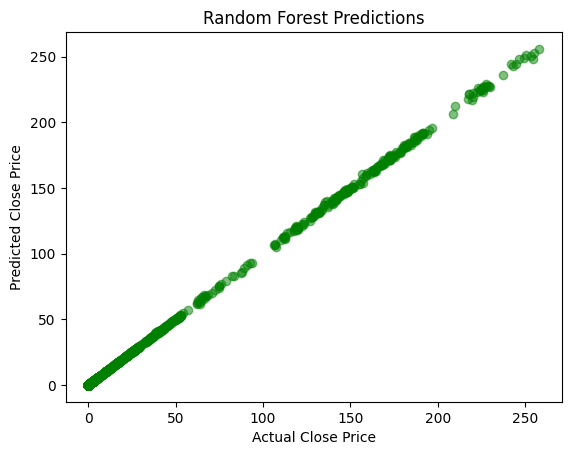

In [23]:
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Random Forest Predictions")
plt.show()

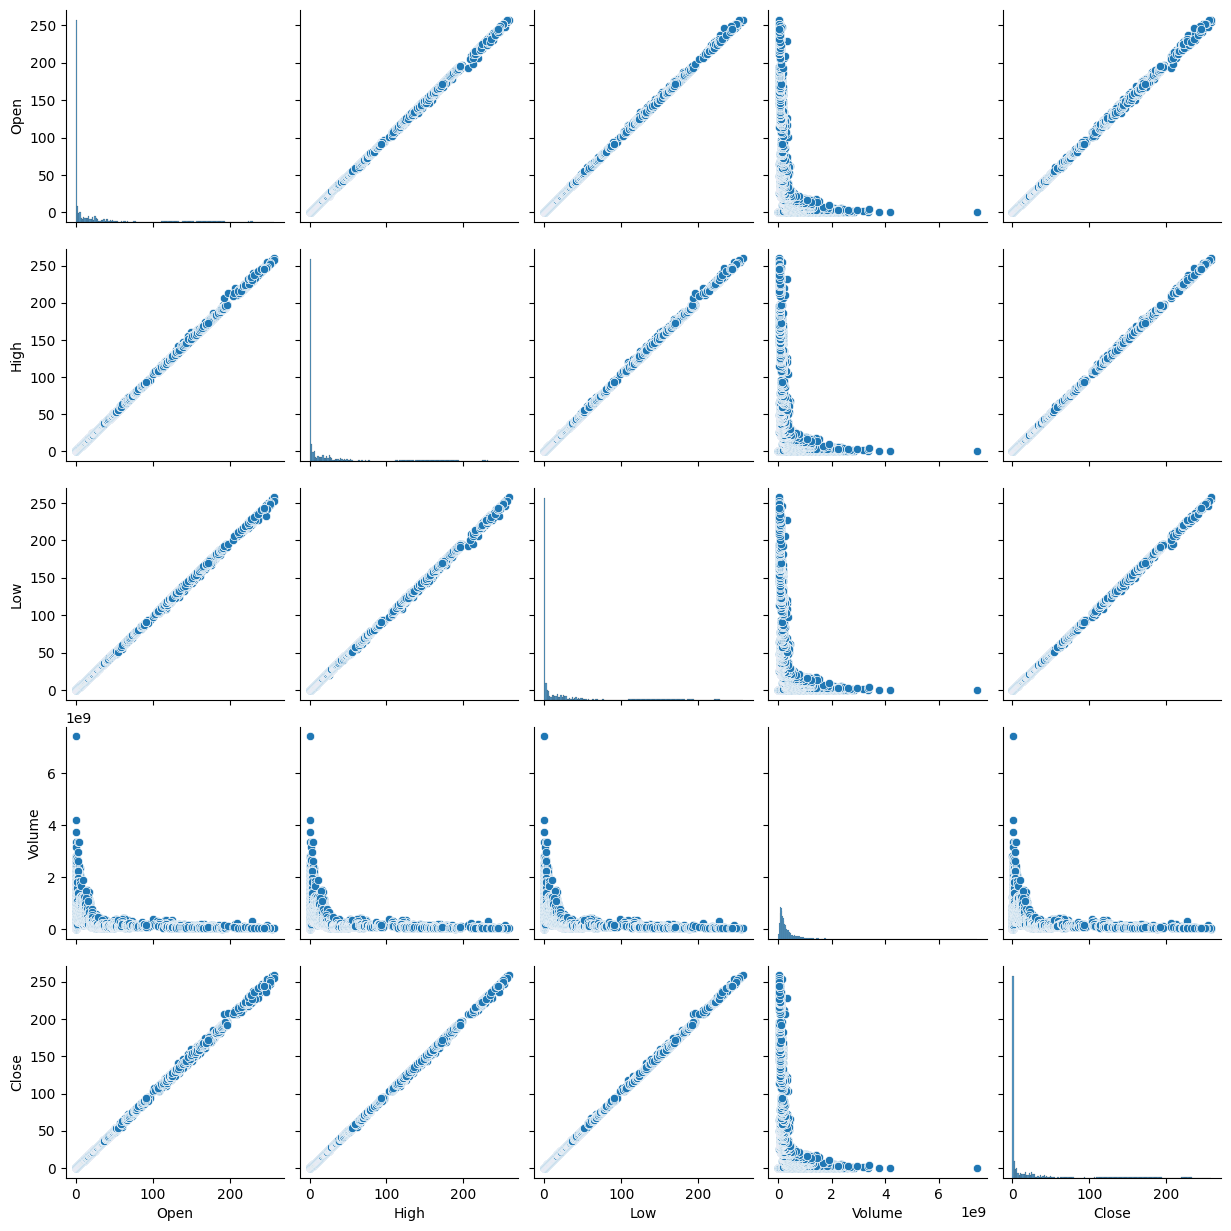

In [24]:
sns.pairplot(df[['Open', 'High', 'Low', 'Volume', 'Close']])
plt.show()

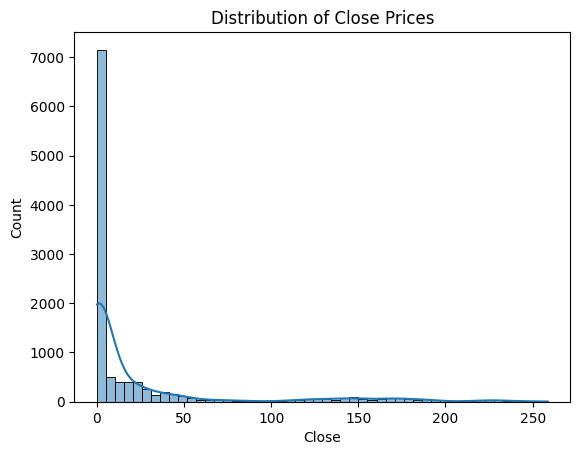

In [25]:
sns.histplot(df['Close'], bins=50, kde=True)
plt.title("Distribution of Close Prices")
plt.show()

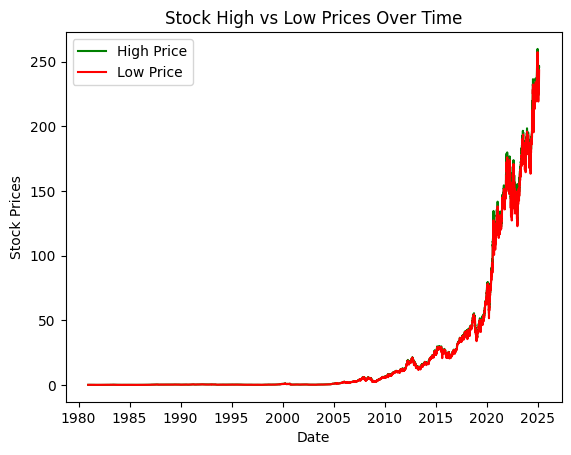

In [26]:
sns.lineplot(x=df['Date'], y=df['High'], label='High Price', color='green')
sns.lineplot(x=df['Date'], y=df['Low'], label='Low Price', color='red')
plt.xlabel("Date")
plt.ylabel("Stock Prices")
plt.title("Stock High vs Low Prices Over Time")
plt.legend()
plt.show()